In [73]:
import qutip as qt
import numpy as np

In [79]:
sx, sy, sz = qt.sigmax(), qt.sigmay(), qt.sigmaz()   
s0 = qt.qeye(2)

eps = -6 #detuning
tc = 10 #tunnel coupling
T = 100 # Temeprature in mK
kb = 0.0861733035 # Boltzmann constant in meV/K

H = tc*sx + eps/2*sz  #
E,V = H.eigenstates()
dE = E[1]-E[0]

gm = 0.1
gp = 0.1*gm

psi0 = V[0]

sp = V[1]*V[0].dag()
sm = V[0]*V[1].dag()

T = 1e3 #1 mus

In [80]:
#implement monte carlo simulation
trajectories = 10
times = np.linspace(0,T,100)
occ_R = np.zeros((trajectories,len(times))) 
for traj in range(trajectories):
    res = qt.mcsolve(H, psi0, times, c_ops=[np.sqrt(gm)*sm, np.sqrt(gp)*sp], e_ops= [(s0+sz)/2], ntraj=1)
    occ_R[traj] = res.expect[0]

res2 = qt.mesolve(H, psi0, times, c_ops=[np.sqrt(gm)*sm, np.sqrt(gp)*sp], e_ops= [(s0+sz)/2,sx,sy])

Total run time:   0.65s
Total run time:   0.68s
Total run time:   0.61s
Total run time:   0.62s
Total run time:   0.59s
Total run time:   0.67s
Total run time:   0.61s
Total run time:   0.64s
Total run time:   0.63s
Total run time:   0.66s


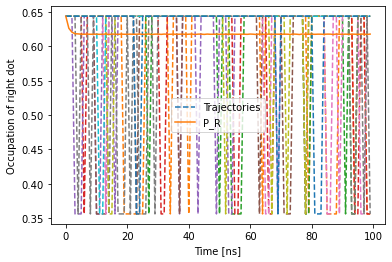

In [81]:
import matplotlib.pyplot as plt
plt.plot([],[],"--", label="Trajectories")
plt.plot(occ_R.T, "--")
plt.plot(res2.expect[0], label="P_R")
plt.ylabel("Occupation of right dot")
plt.xlabel("Time [ns]")
plt.legend()